In [2]:
import sklearn.ensemble as s
import sklearn.linear_model as lm
import sklearn.cross_validation as cw
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def learn_rf(X_train, y_train, X_test, y_test, num_trees):
    rfc = s.RandomForestRegressor(n_estimators = num_trees,random_state=123)
    rfc.fit(X_train, y_train)
    rfc.score(X_train, y_train)
    importances = rfc.feature_importances_
    estimators = rfc.estimators_
    
    pred_train = np.array(rfc.predict(X_train))
    pred_train_ind = list()
    
    
    for e in estimators:   
        temp_pred_train = np.array(e.predict(X_train))
        pred_train_ind.append(np.array(temp_pred_train)) 
    pred_train_ind = np.array(pred_train_ind).T
    
    pred_test = np.array(rfc.predict(X_test))

    pred_test_ind = list() 
    
    for e in estimators:   
        temp_pred_test = np.array(e.predict(X_test))
        pred_test_ind.append(np.array(temp_pred_test))
    pred_test_ind = np.array(pred_test_ind).T
    
    return importances, pred_train, pred_train_ind, pred_test, pred_test_ind

In [4]:
def learn_gbt(X_train, y_train, X_test, y_test, num_trees, learning_rate):
    gbc = s.GradientBoostingRegressor(n_estimators=num_trees, learning_rate=learning_rate,random_state=123)
    gbc.fit(X_train, y_train)
    feature_importances = gbc.feature_importances_
    pred_train = np.array(gbc.predict(X_train))
    
    pred_train_staged = list()
    stages = gbc.staged_predict(X_train)
    for i in stages:
        pred_train_staged.append(np.array(i))
    pred_train_staged = np.array(pred_train_staged)
    pred_train_staged = pred_train_staged.T
    
    pred_test = np.array(gbc.predict(X_test))
                                 
    pred_test_staged = list()
    stages = gbc.staged_predict(X_test)
    for i in stages:
        pred_test_staged.append(np.array(i))
    pred_test_staged = np.array(pred_test_staged)
    pred_test_staged = pred_test_staged.T
    
    return feature_importances, pred_train, pred_train_staged, pred_test,pred_test_staged

In [5]:
def squared_error(y_true, y_hat):
#     i=0
#     res = list()
#     while i < min(len(y_true),len(y_hat)):
#         res.append((y_true[i]- y_hat[i])**2)
#         i+=1
#     res = np.array(res)
#     return res
    return np.array((y_true-y_hat)**2)
    
def error(y_true, y_hat):
    i=0
    res = list()
    while i < min(len(y_true),len(y_hat)):
        res.append((y_true[i]- y_hat[i]))
        i+=1
    res = np.array(res)
    return res

In [6]:
def fine_tuning(y_train, pred_train_ind, y_test, pred_test_ind):
    lr_train = lm.LinearRegression()
    lr_train.fit(pred_train_ind, y_train)
    train_coefs = lr_train.coef_
    train = []
    for i in range(len(train_coefs)):
        if i ==0:
            train = train_coefs[i]*pred_train_ind[:,i]
        else:
            train = train + train_coefs[i]*pred_train_ind[:,i]
    
#     lr_test = lm.LinearRegression()
#     lr_test.fit(pred_test_ind,y_test)
    test_coefs = train_coefs
    test = []
    for i in range(len(test_coefs)):
        if i == 0:
            test = test_coefs[i]*pred_test_ind[:,i]
        else:
            test = test + test_coefs[i]*pred_test_ind[:,i]
    
    return train, test

In [7]:
test = pd.read_csv('california.dat', header=0)
data = list()
labels = list()
#test = test.ix[0:9]
for i in test['MedianHouseValue']:
    labels.append(i)
labels = np.array(labels)


# t = test.iloc[[0]]['Longitude']
# x = list()
# x.append(t)
# for i in x:
#     print i
w = test.columns.values.tolist()
print w
data = test[[0, 1, 2, 3, 4, 5, 6, 7]].values[0:]
print len(data)
    

['Longitude', 'Latitude', 'HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 'Population', 'Households', 'MedianIncome', 'MedianHouseValue']
20640


In [8]:
random_state = 123
train_data,test_data,train_labels,test_labels = cw.train_test_split(data,labels,test_size = 0.2)
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

16512
16512
4128
4128


In [9]:
importances_rf_10, pred_train_rf_10, pred_train_ind_rf_10, pred_test_rf_10, pred_test_ind_rf_10 = learn_rf(train_data,train_labels, test_data,test_labels,10)

In [10]:
importances_rf_20, pred_train_rf_20, pred_train_ind_rf_20, pred_test_rf_20, pred_test_ind_rf_20 = learn_rf(train_data,train_labels, test_data,test_labels,20)

In [11]:
importances_rf_30, pred_train_rf_30, pred_train_ind_rf_30, pred_test_rf_30, pred_test_ind_rf_30 = learn_rf(train_data,train_labels, test_data,test_labels,30)

In [12]:
importances_rf_50, pred_train_rf_50, pred_train_ind_rf_50, pred_test_rf_50, pred_test_ind_rf_50 = learn_rf(train_data,train_labels, test_data,test_labels,50)

In [13]:
importances_rf_100, pred_train_rf_100, pred_train_ind_rf_100, pred_test_rf_100, pred_test_ind_rf_100 = learn_rf(train_data,train_labels, test_data,test_labels,100)

In [14]:
importances_rf_200, pred_train_rf_200, pred_train_ind_rf_200, pred_test_rf_200, pred_test_ind_rf_200 = learn_rf(train_data,train_labels, test_data,test_labels,200)

In [15]:
importances_rf_250, pred_train_rf_250, pred_train_ind_rf_250, pred_test_rf_250, pred_test_ind_rf_250 = learn_rf(train_data,train_labels, test_data,test_labels,250)

In [18]:
res = np.zeros(len(importances_rf_10))
for i in range(len(importances_rf_10)):
    importance = importances_rf_10[i] + importances_rf_20[i] + importances_rf_30[i] + importances_rf_50[i] + importances_rf_100[i]+importances_rf_200[i]
    res[i]+= importance
print res/6

[ 0.1613503   0.1483463   0.06682785  0.02501009  0.02788788  0.03643721
  0.01963489  0.51450549]


# We can see that the most important features has indexes 0, 1 and 7. They are:

In [17]:
print w[0]
print w[1]
print w[7]

Longitude
Latitude
MedianIncome


In [18]:
def plot_task(pred_train_ind, pred_test_ind, pred_train, pred_test):
    pred_train_ind_rf_10 = pred_train_ind
    pred_test_ind_rf_10 = pred_test_ind
    pred_train_rf_10 = pred_train
    pred_test_rf_10 = pred_test
    
    train_individual_rf_10= list()
    for i in range(len(pred_train_ind_rf_10[0])):
        the_only_tree_prediction = pred_train_ind_rf_10[:,i]
        errors = error(train_labels, the_only_tree_prediction)
        variance = np.var(errors)
        train_individual_rf_10.append(variance)
# print train_individual_rf_100

    test_individual_rf_10= list()
    for i in range(len(pred_test_ind_rf_10[0])):
        the_only_tree_prediction = pred_test_ind_rf_10[:,i]
        errors = error(test_labels, the_only_tree_prediction)
        variance = np.var(errors)
        test_individual_rf_10.append(variance)
# print test_individual_rf_100


    errors = error(train_labels, pred_train_rf_10)
    variance = np.var(errors)
    train_ansamble_rf_10 = list()
    for i in range(len(train_individual_rf_10)):
        train_ansamble_rf_10.append(variance)
# print train_ansamble_rf_100

    errors = error(test_labels, pred_test_rf_10)
    variance = np.var(errors)
    test_ansamble_rf_10 = list()
    for i in range(len(test_individual_rf_10)):
        test_ansamble_rf_10.append(variance)
# print test_ansamble_rf_100

    l = plt.figure(figsize=(20, 10))
    pylab.plot(train_individual_rf_10, c = '#0000FF', label = 'Individual Train')
    pylab.plot(train_ansamble_rf_10, c='#8A2BE2', label='Ansamble Train' )
    pylab.plot(test_individual_rf_10, c= 'r', label='Individual Test' )
    pylab.plot(test_ansamble_rf_10, c='#8B0000', label='Ansamble Test' )
    pylab.xlabel('Number of trees')
    pylab.ylabel("Variance of errors")
    pylab.legend(loc='best')

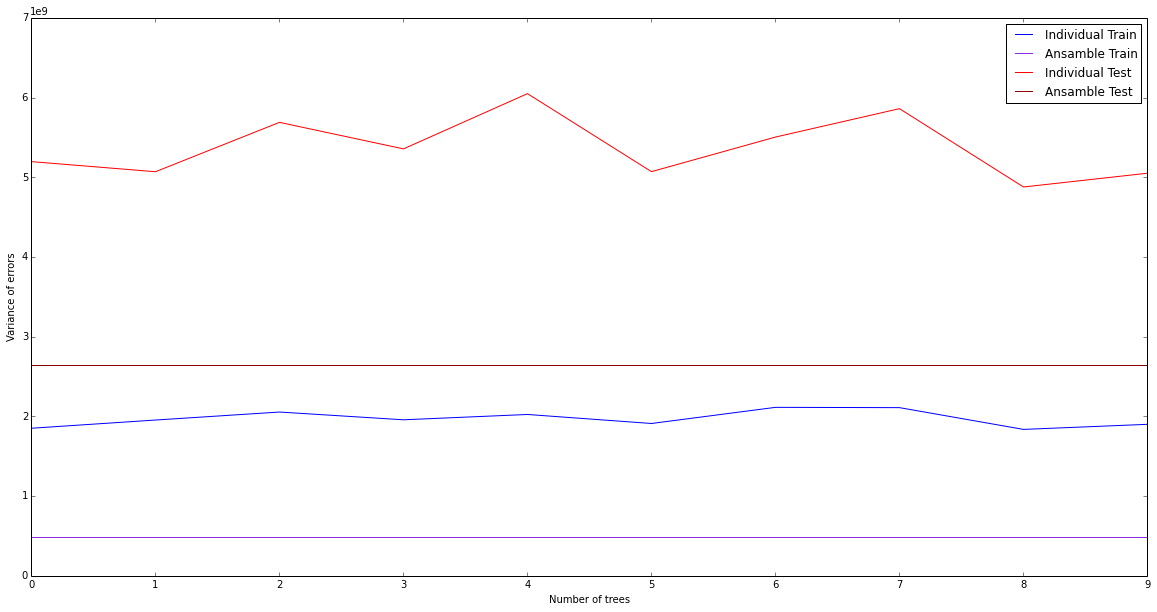

In [19]:
plot_task(pred_train_ind_rf_10, pred_test_ind_rf_10, pred_train_rf_10, pred_test_rf_10)

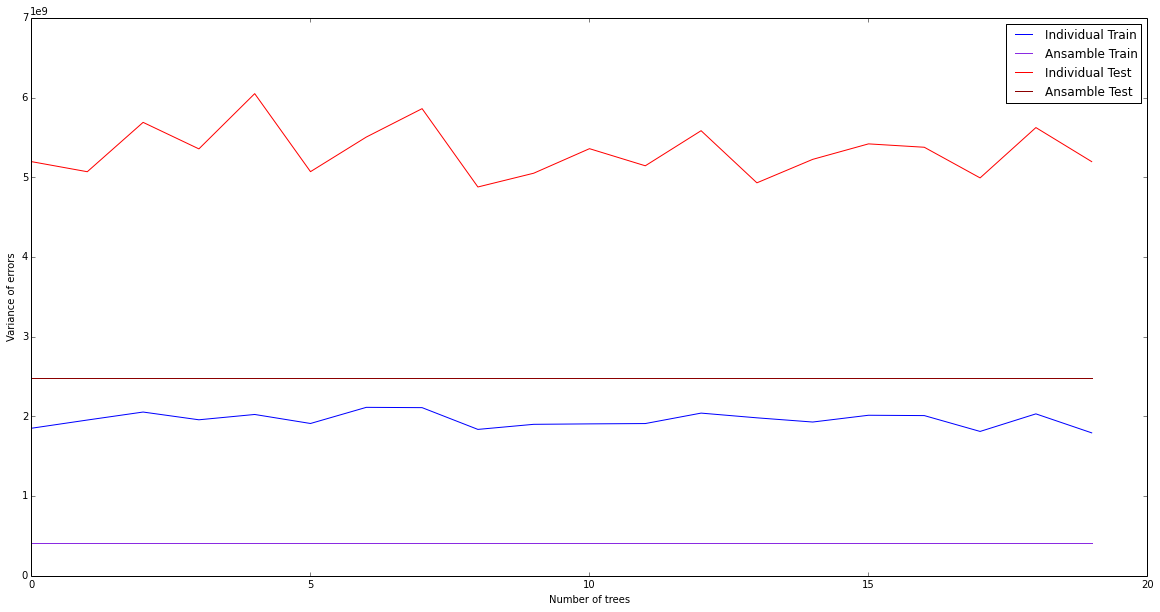

In [20]:
plot_task(pred_train_ind_rf_20, pred_test_ind_rf_20, pred_train_rf_20, pred_test_rf_20)

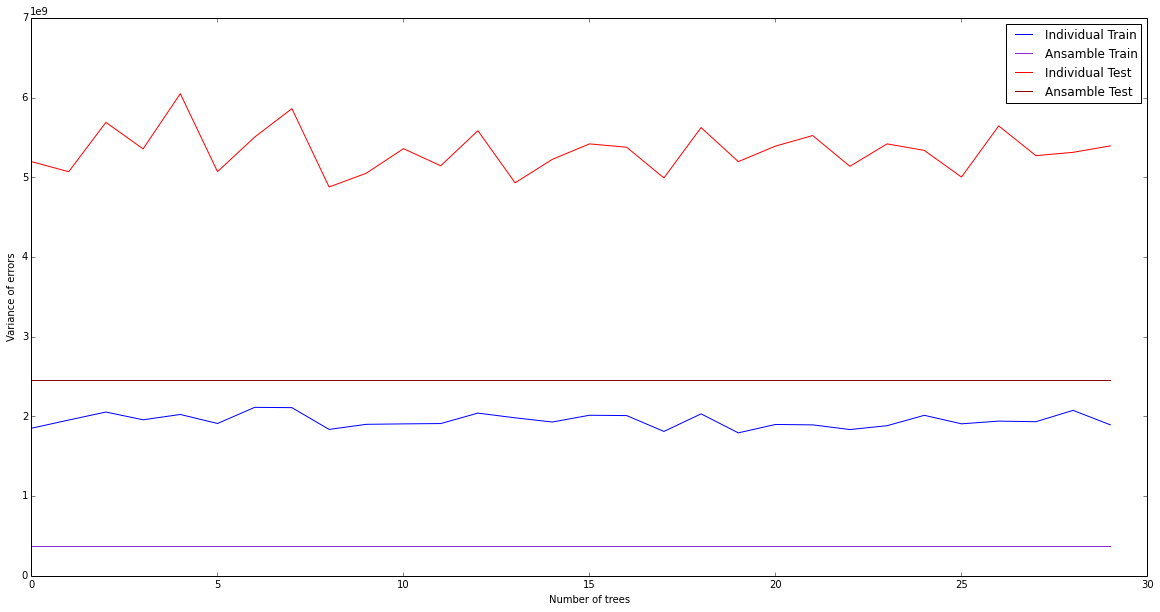

In [21]:
plot_task(pred_train_ind_rf_30, pred_test_ind_rf_30, pred_train_rf_30, pred_test_rf_30)

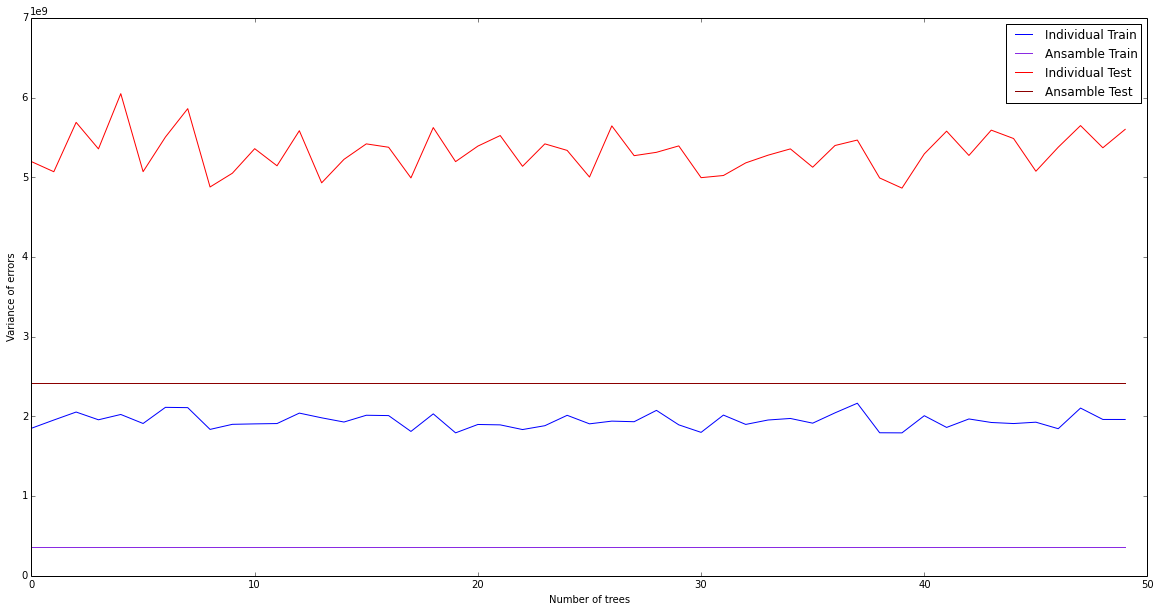

In [22]:
plot_task(pred_train_ind_rf_50, pred_test_ind_rf_50, pred_train_rf_50, pred_test_rf_50)

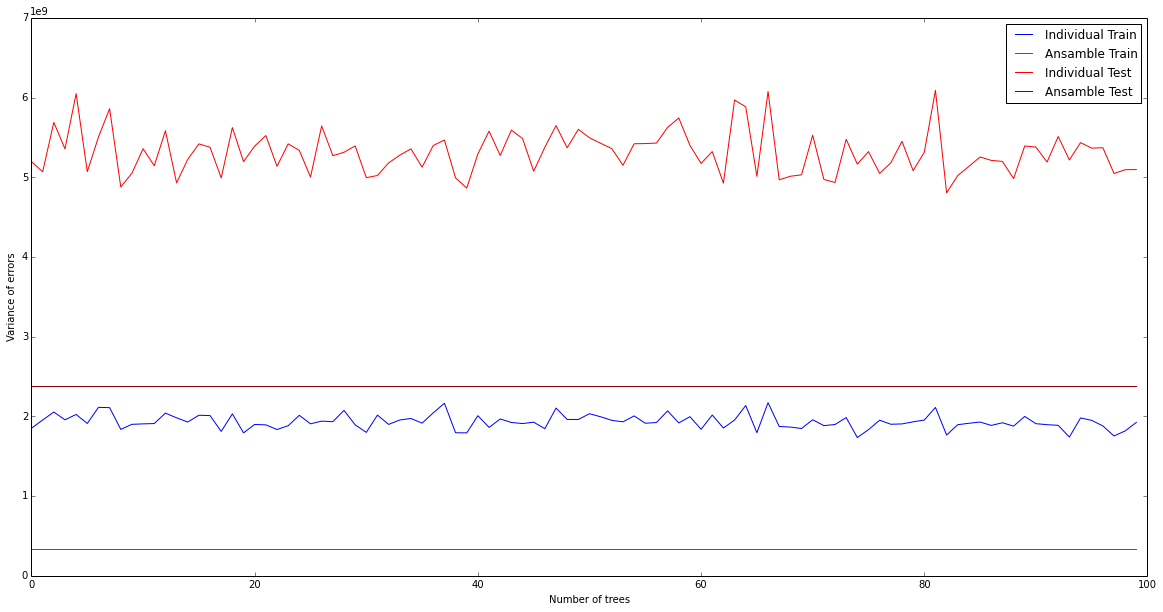

In [23]:
plot_task(pred_train_ind_rf_100, pred_test_ind_rf_100, pred_train_rf_100, pred_test_rf_100)

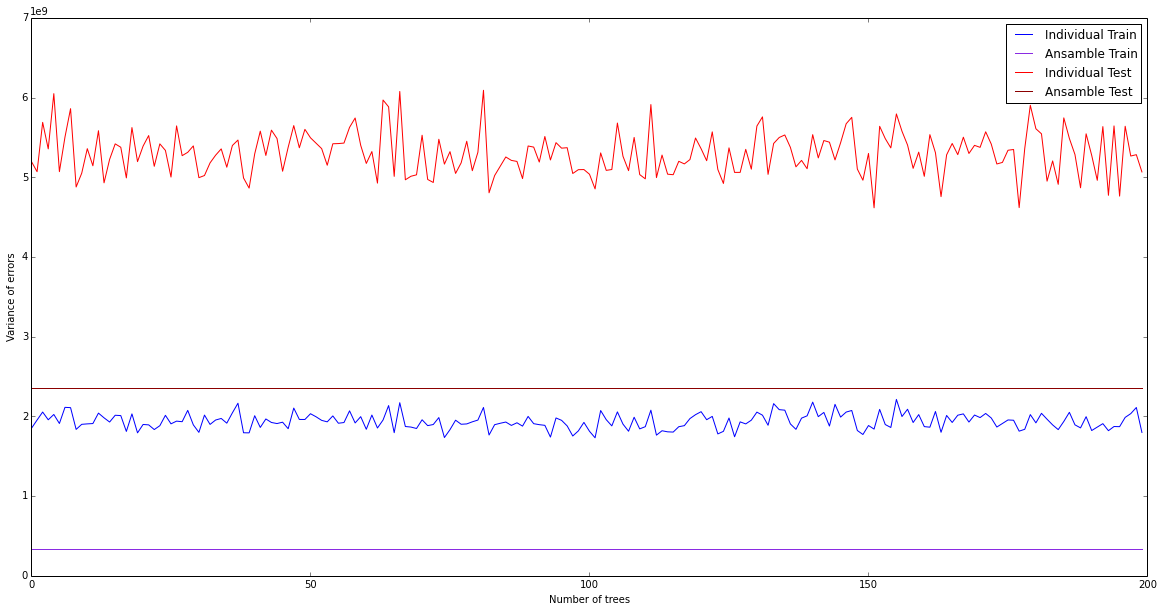

In [24]:
plot_task(pred_train_ind_rf_200, pred_test_ind_rf_200, pred_train_rf_200, pred_test_rf_200)

It is obvious from the graphs, that variance of ansambles is less than variances of individuals trees. And it is an expectational situation, because individual trees are trained with the help of bagging of objects and not on all features, so individually they yield poor accuracy on the whole train_set, on test we have the same situation.  So their variance is significantly bigger than ansamble's one.

Another important moment is that the more trees we have in our model the more variance of an individual one fluctuates. It also can be explained by bagging. The more trees we have, the more "bags" we have, th more number of combinations of objects and features can be in one bag.

In [20]:
importances_gbt_1000, pred_train_gbt_1000, pred_train_ind_gbt_1000, pred_test_gbt_1000, pred_test_ind_gbt_1000 = learn_gbt(train_data,train_labels, test_data,test_labels,1000,0.2)
importances_gbt_500, pred_train_gbt_500, pred_train_ind_gbt_500, pred_test_gbt_500, pred_test_ind_gbt_500 = learn_gbt(train_data,train_labels, test_data,test_labels,500,0.2)
importances_gbt_100, pred_train_gbt_100, pred_train_ind_gbt_100, pred_test_gbt_100, pred_test_ind_gbt_100 = learn_gbt(train_data,train_labels, test_data,test_labels,100,0.2)

In [21]:
tuned_train_gbt_100, tuned_test_gbt_100 = fine_tuning(train_labels,pred_train_ind_gbt_100,test_labels, pred_test_ind_gbt_100)
tuned_train_gbt_500, tuned_test_gbt_500 = fine_tuning(train_labels,pred_train_ind_gbt_500,test_labels, pred_test_ind_gbt_500)
tuned_train_gbt_1000, tuned_test_gbt_1000 = fine_tuning(train_labels,pred_train_ind_gbt_1000,test_labels, pred_test_ind_gbt_1000)

In [22]:
errors_gbt_100 = squared_error(test_labels, pred_test_gbt_100)    
variance_gbt_100 = np.var(errors_gbt_100)
mean_gbt_100 = np.mean(errors_gbt_100)

errors_gbt_500 = squared_error(test_labels, pred_test_gbt_500)    
variance_gbt_500 = np.var(errors_gbt_500)
mean_gbt_500 = np.mean(errors_gbt_500)

errors_gbt_1000 = squared_error(test_labels, pred_test_gbt_1000)    
variance_gbt_1000 = np.var(errors_gbt_1000)
mean_gbt_1000 = np.mean(errors_gbt_1000)

tuned_test_errors_gbt_100 = squared_error(test_labels, tuned_test_gbt_100)    
tuned_test_variance_gbt_100 = np.var(tuned_test_errors_gbt_100)
tuned_test_mean_gbt_100 = np.mean(tuned_test_errors_gbt_100)

tuned_test_errors_gbt_500 = squared_error(test_labels, tuned_test_gbt_500)    
tuned_test_variance_gbt_500 = np.var(tuned_test_errors_gbt_500)
tuned_test_mean_gbt_500 = np.mean(tuned_test_errors_gbt_500)

tuned_test_errors_gbt_1000 = squared_error(test_labels, tuned_test_gbt_1000)    
tuned_test_variance_gbt_1000 = np.var(tuned_test_errors_gbt_1000)
tuned_test_mean_gbt_1000 = np.mean(tuned_test_errors_gbt_1000)

In [23]:
print importances_gbt_1000

[ 0.16466139  0.15447129  0.07763199  0.12968465  0.08062673  0.1274814
  0.09246652  0.17297601]


# Still the most important features have indeces 0,1,7. They are

In [24]:
print w[0]
print w[1]
print w[7]

Longitude
Latitude
MedianIncome


Important features are still the same, but the absolute values of their importance are different. It can be explained by the following fact. Gradient boosting is a greedy algorithm. On each step it looks for a minimum, and there is no guarantee that it finds global minimum, but not local.

In [27]:
train_means= list()
for i in range(len(pred_train_ind_gbt_1000[0])):
    only_prediction = pred_train_ind_gbt_1000[:,i]
    errors = squared_error(train_labels, only_prediction)
    mean = np.mean(errors)
    train_means.append(mean)
    
test_means = list()
for i in range(len(pred_test_ind_gbt_1000[0])):
    only_prediction = pred_test_ind_gbt_1000[:,i]
    errors = squared_error(test_labels, only_prediction)
    mean = np.mean(errors)
    test_means.append(mean)

1000


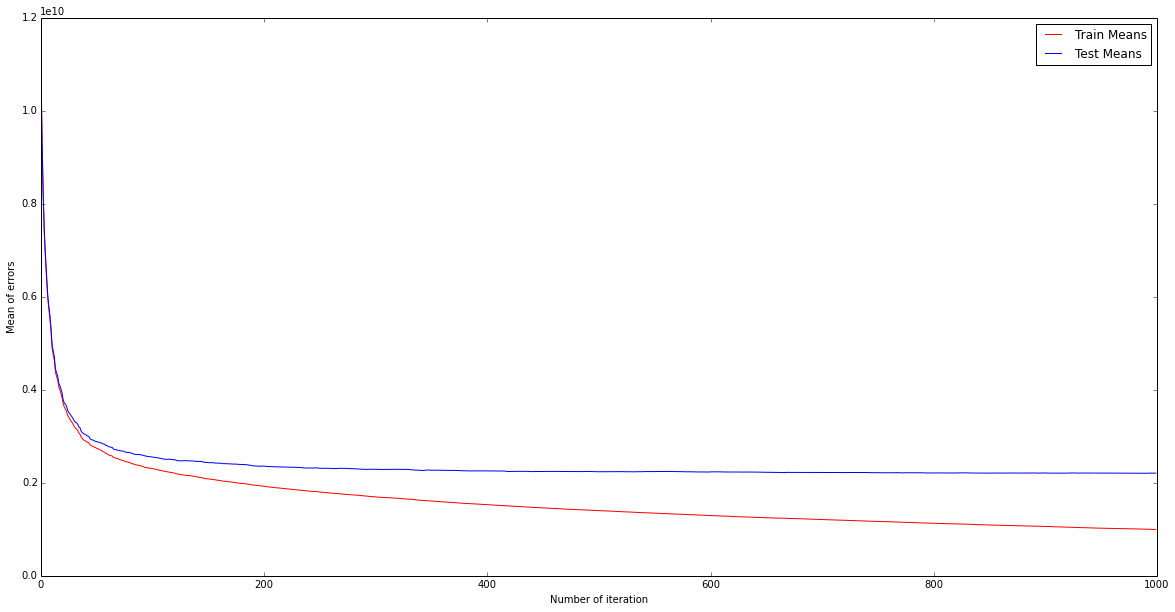

In [29]:
print len(pred_train_ind_gbt_1000[0])
l = plt.figure(figsize=(20, 10))
pylab.plot(train_means, c = 'r', label = 'Train Means')
pylab.plot(test_means, c = 'b', label = 'Test Means')
pylab.xlabel('Number of iteration')
pylab.ylabel("Mean of errors")
pylab.legend(loc='best')

Explanation of an effect, that test error begins to increase, while train decreases, at some iteration can be explained by overfitting.

In [30]:
tuned_train_rf_10, tuned_test_rf_10 = fine_tuning(train_labels,pred_train_ind_rf_10,test_labels, pred_test_ind_rf_10)
tuned_train_rf_50, tuned_test_rf_50 = fine_tuning(train_labels,pred_train_ind_rf_50,test_labels, pred_test_ind_rf_50)
tuned_train_rf_100, tuned_test_rf_100 = fine_tuning(train_labels,pred_train_ind_rf_100,test_labels, pred_test_ind_rf_100)
tuned_train_rf_250, tuned_test_rf_250 = fine_tuning(train_labels,pred_train_ind_rf_250,test_labels, pred_test_ind_rf_250)

In [34]:
errors_rf_10 = squared_error(test_labels, pred_test_rf_10)    
variance_rf_10 = np.var(errors_rf_10)
mean_rf_10 = np.mean(errors_rf_10)

errors_rf_50 = squared_error(test_labels, pred_test_rf_50)    
variance_rf_50 = np.var(errors_rf_50)
mean_rf_50 = np.mean(errors_rf_50)

errors_rf_100 = squared_error(test_labels, pred_test_rf_100)    
variance_rf_100 = np.var(errors_rf_100)
mean_rf_100 = np.mean(errors_rf_100)

errors_rf_250 = squared_error(test_labels, pred_test_rf_250)    
variance_rf_250 = np.var(errors_rf_250)
mean_rf_250 = np.mean(errors_rf_250)

tuned_test_errors_rf_10 = squared_error(test_labels, tuned_test_rf_10)    
tuned_test_variance_rf_10 = np.var(tuned_test_errors_rf_10)
tuned_test_mean_rf_10 = np.mean(tuned_test_errors_rf_10)

tuned_test_errors_rf_50 = squared_error(test_labels, tuned_test_rf_50)    
tuned_test_variance_rf_50 = np.var(tuned_test_errors_rf_50)
tuned_test_mean_rf_50 = np.mean(tuned_test_errors_rf_50)

tuned_test_errors_rf_100 = squared_error(test_labels, tuned_test_rf_100)    
tuned_test_variance_rf_100 = np.var(tuned_test_errors_rf_100)
tuned_test_mean_rf_100 = np.mean(tuned_test_errors_rf_100)

tuned_test_errors_rf_250 = squared_error(test_labels, tuned_test_rf_250)    
tuned_test_variance_rf_250 = np.var(tuned_test_errors_rf_250)
tuned_test_mean_rf_250 = np.mean(tuned_test_errors_rf_250)

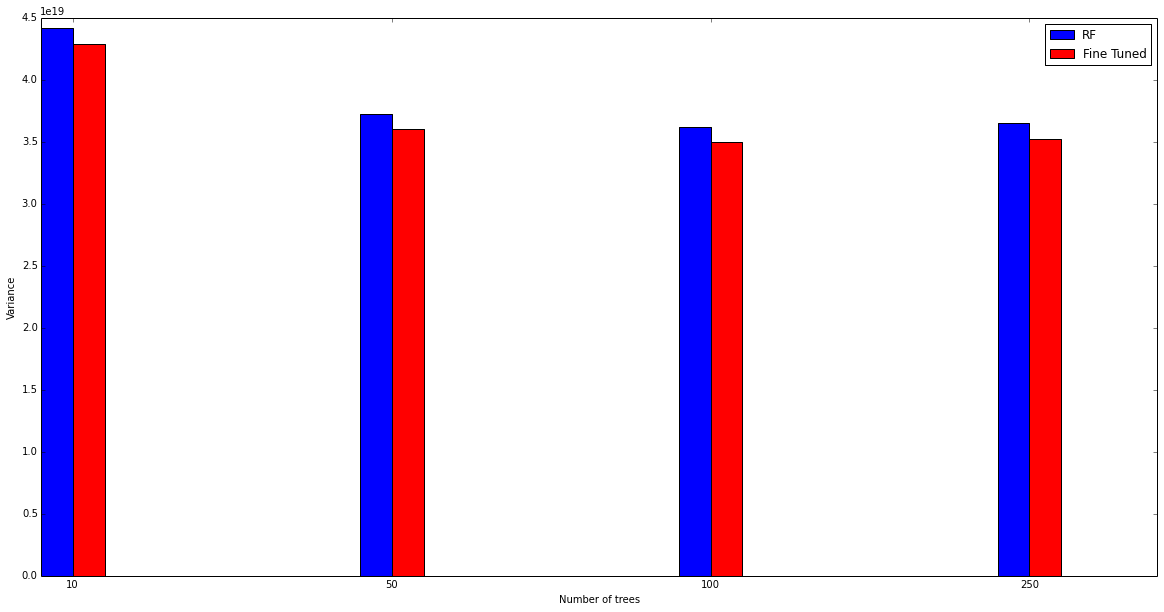

In [35]:
mpl_fig = plt.figure(figsize=(20, 10))
ax = mpl_fig.add_subplot(111)
variance = (variance_rf_10,variance_rf_50,variance_rf_100,variance_rf_250)
#tuned_test_bar = (tuned_test_errors,tuned_test_errors,tuned_test_errors,tuned_test_errors)
tuned_test_bar = (tuned_test_variance_rf_10,tuned_test_variance_rf_50,tuned_test_variance_rf_100,tuned_test_variance_rf_250)
ax.bar(np.arange(4),variance,0.1)
ax.bar(np.arange(4) + 0.1 , tuned_test_bar,0.1,color='r')
ax.set_xticks(np.arange(4) + 0.1)
ax.set_xticklabels((10,50,100,250))
ax.legend(("RF","Fine Tuned"))
ax.set_xlabel("Number of trees")
ax.set_ylabel("Variance")

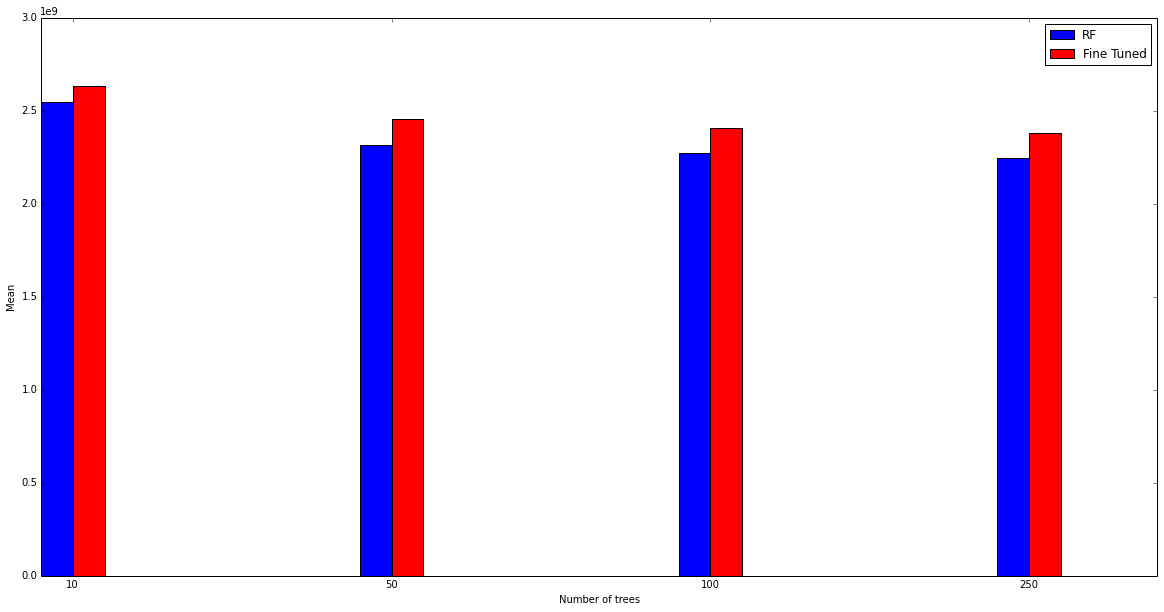

In [36]:
mpl_fig = plt.figure(figsize=(20, 10))
ax = mpl_fig.add_subplot(111)
mean = (mean_rf_10,mean_rf_50,mean_rf_100,mean_rf_250)
#tuned_test_bar = (tuned_test_errors,tuned_test_errors,tuned_test_errors,tuned_test_errors)
tuned_test_bar = (tuned_test_mean_rf_10,tuned_test_mean_rf_50,tuned_test_mean_rf_100,tuned_test_mean_rf_250)
ax.bar(np.arange(4),mean,0.1)
ax.bar(np.arange(4) + 0.1 , tuned_test_bar,0.1,color='r')
ax.set_xticks(np.arange(4) + 0.1)
ax.set_xticklabels((10,50,100,250))
ax.legend(("RF","Fine Tuned"))
ax.set_xlabel("Number of trees")
ax.set_ylabel("Mean")

Random Forest fit individual trees with bagging, so their individaul predictions on the whole train_set is not overfitted, but when we use LinearRegressor for for this trees on train_set we force overfitting.

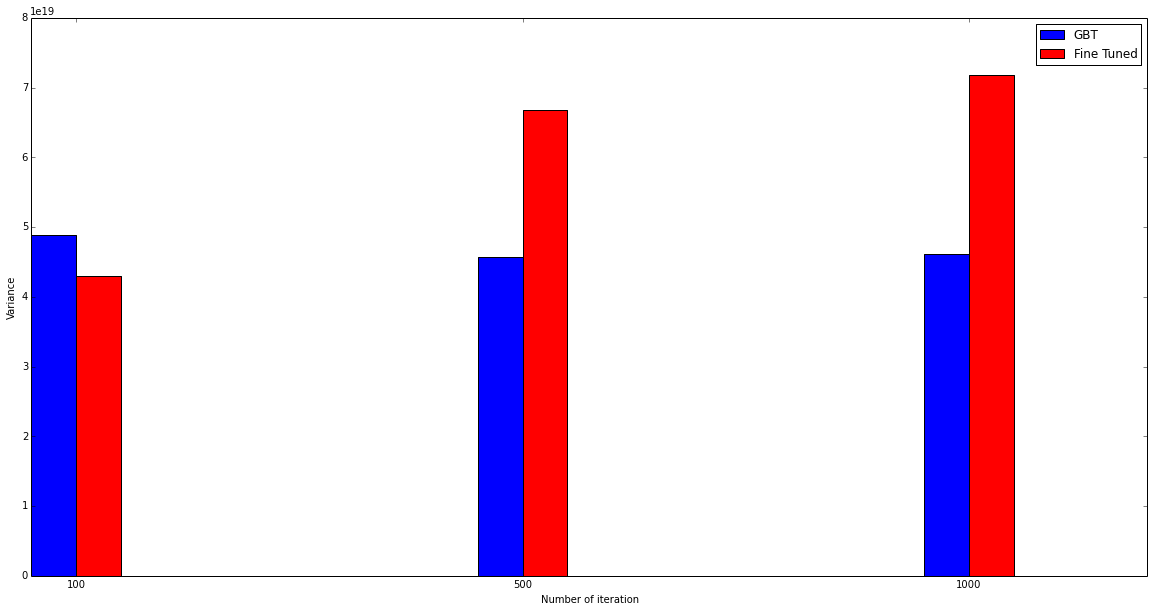

In [64]:
mpl_fig = plt.figure(figsize=(20, 10))
ax = mpl_fig.add_subplot(111)
variance = (variance_gbt_100,variance_gbt_500,variance_gbt_1000)
#tuned_test_bar = (tuned_test_errors,tuned_test_errors,tuned_test_errors,tuned_test_errors)
tuned_test_bar = (tuned_test_variance_gbt_100,tuned_test_variance_gbt_500,tuned_test_variance_gbt_1000)
ax.bar(np.arange(3),variance,0.1)
ax.bar(np.arange(3) + 0.1 , tuned_test_bar,0.1,color='r')
ax.set_xticks(np.arange(3) + 0.1)
ax.set_xticklabels((100,500,1000))
ax.legend(("GBT","Fine Tuned"))
ax.set_xlabel("Number of iteration")
ax.set_ylabel("Variance")

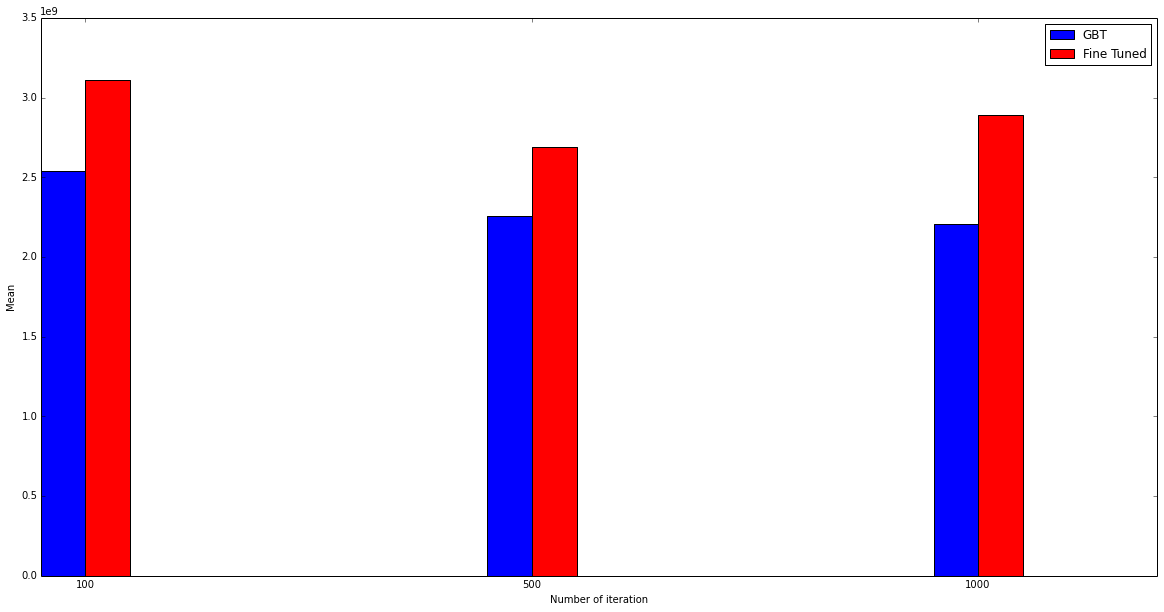

In [67]:
mpl_fig = plt.figure(figsize=(20, 10))
ax = mpl_fig.add_subplot(111)
mean = (mean_gbt_100,mean_gbt_500,mean_gbt_1000)
#tuned_test_bar = (tuned_test_errors,tuned_test_errors,tuned_test_errors,tuned_test_errors)
tuned_test_bar = (tuned_test_mean_gbt_100,tuned_test_mean_gbt_500,tuned_test_mean_gbt_1000)
ax.bar(np.arange(3),mean,0.1)
ax.bar(np.arange(3) + 0.1 , tuned_test_bar,0.1,color='r')
ax.set_xticks(np.arange(3) + 0.1)
ax.set_xticklabels((100,500,1000))
ax.legend(("GBT","Fine Tuned"))
ax.set_xlabel("Number of iteration")
ax.set_ylabel("Mean")

At every stage GBT pays attention to some objects, so it is overfitted. And when we fine_tunes we make it more overfitted. 